In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
df = pd.read_csv("C:/Users/admin/Documents/AIML/SEM 5/ds/project/creditcard.csv").sample(10000, random_state=42)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19,1
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12,0
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00,0
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50,0
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89,0


In [4]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

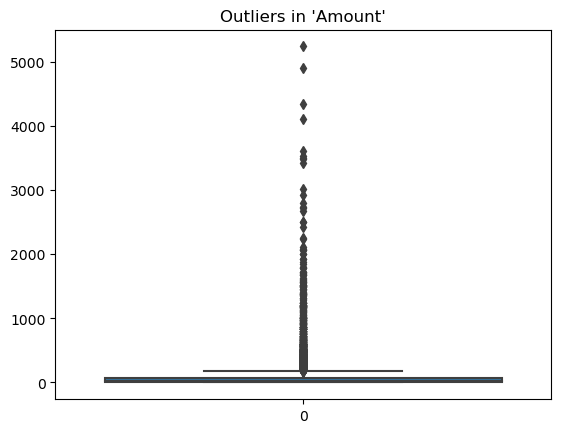

Number of outliers: 162


In [5]:
sns.boxplot(df['Amount'])
plt.title("Outliers in 'Amount'")
plt.show()

z_scores = np.abs(stats.zscore(df['Amount']))
outliers = df[z_scores > 3]
print("Number of outliers:", len(outliers))

In [6]:
df_clean = df[z_scores <= 3]
df_clean.shape

(9838, 31)

C:\Users\admin\AppData\Local\Temp\ipykernel_17336\1671310968.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Amount_log'] = np.log1p(df_clean['Amount'])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


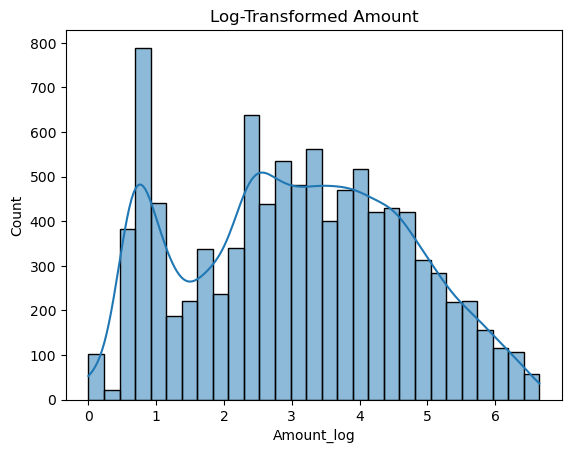

In [7]:
df_clean['Amount_log'] = np.log1p(df_clean['Amount'])
sns.histplot(df_clean['Amount_log'], kde=True)
plt.title("Log-Transformed Amount")
plt.show()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_clean['Amount_scaled'] = scaler.fit_transform(df_clean[['Amount']])
df_clean[['Amount', 'Amount_scaled']].head()

C:\Users\admin\AppData\Local\Temp\ipykernel_17336\2986411975.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['Amount_scaled'] = scaler.fit_transform(df_clean[['Amount']])


,Amount,Amount_scaled
43428,364.19,2.791558
49906,520.12,4.241178
29474,31.00,-0.305978
276481,1.50,-0.580228
278846,0.89,-0.585899


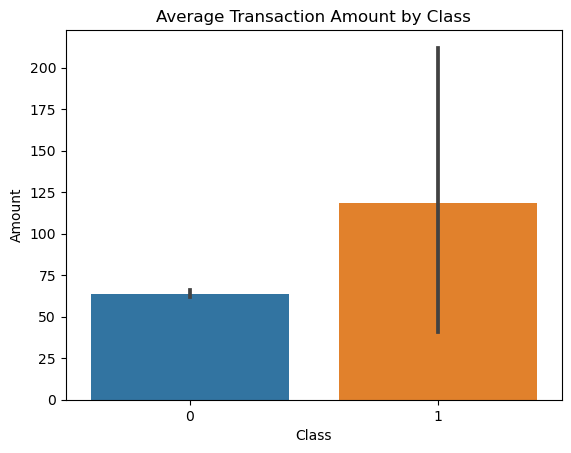

In [9]:
sns.barplot(x='Class', y='Amount', data=df_clean)
plt.title("Average Transaction Amount by Class")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17336\2301598673.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['HighAmount'] = df_clean['Amount'] > df_clean['Amount'].median()


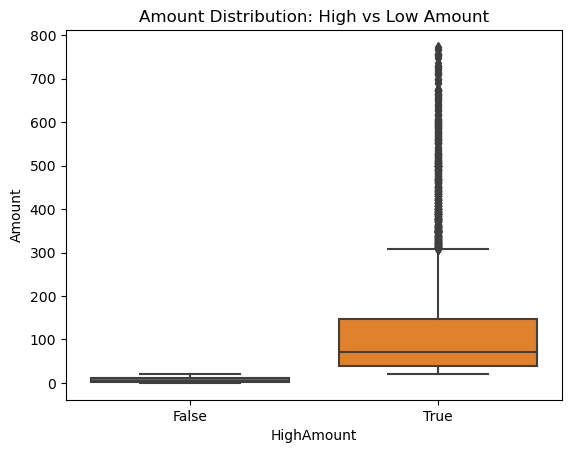

In [10]:
df_clean['HighAmount'] = df_clean['Amount'] > df_clean['Amount'].median()
sns.boxplot(x='HighAmount', y='Amount', data=df_clean)
plt.title("Amount Distribution: High vs Low Amount")
plt.show()

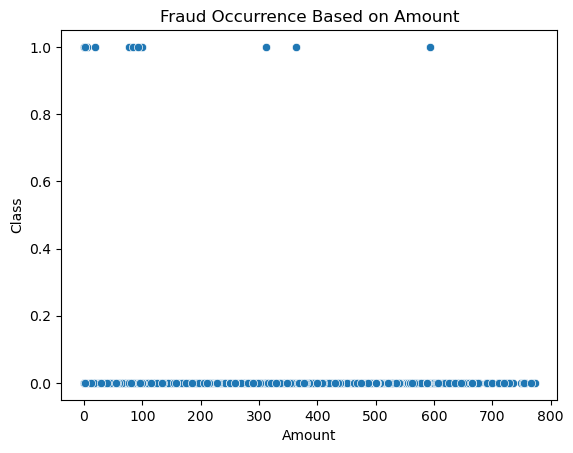

In [11]:
sns.scatterplot(x='Amount', y='Class', data=df_clean)
plt.title("Fraud Occurrence Based on Amount")
plt.show()

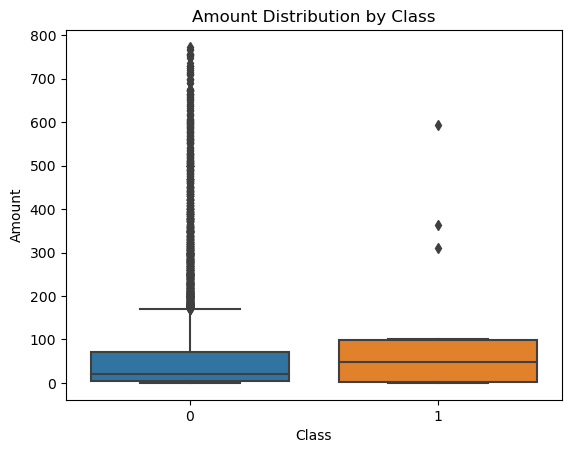

In [12]:
sns.boxplot(x='Class', y='Amount', data=df_clean)
plt.title("Amount Distribution by Class")
plt.show()

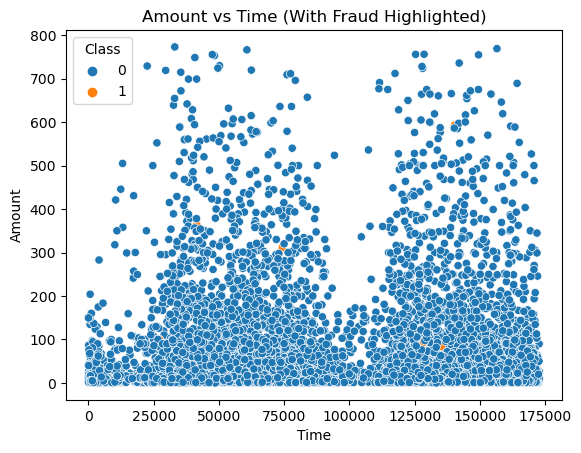

In [13]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df_clean)
plt.title("Amount vs Time (With Fraud Highlighted)")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17336\57852271.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['TimeSegment'] = pd.qcut(df_clean['Time'], 4, labels=["Morning","Afternoon","Evening","Night"])
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\ProgramData\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1057: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future def

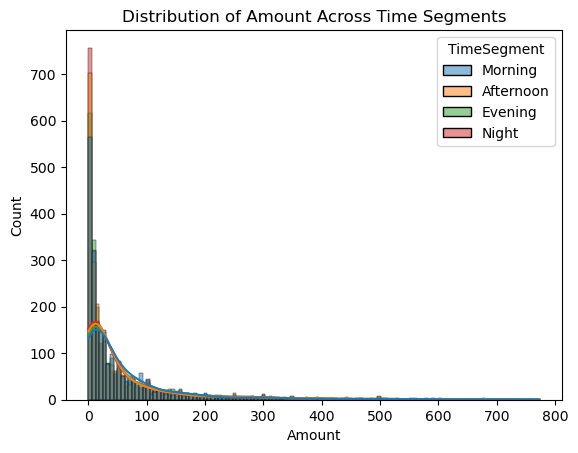

In [14]:
df_clean['TimeSegment'] = pd.qcut(df_clean['Time'], 4, labels=["Morning","Afternoon","Evening","Night"])

sns.histplot(data=df_clean, x='Amount', hue='TimeSegment', kde=True)
plt.title("Distribution of Amount Across Time Segments")
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_17336\3468291605.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_clean['AmountBin'] = pd.qcut(df_clean['Amount'], 5)
C:\Users\admin\AppData\Local\Temp\ipykernel_17336\3468291605.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_avg = df_clean.groupby('AmountBin')['Amount'].mean()


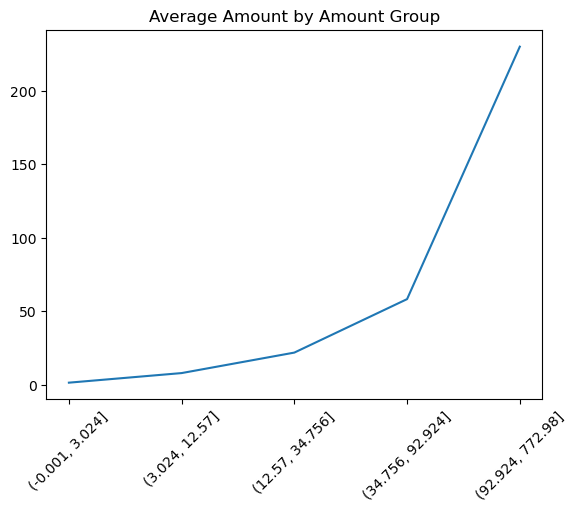

In [15]:
df_clean['AmountBin'] = pd.qcut(df_clean['Amount'], 5)

group_avg = df_clean.groupby('AmountBin')['Amount'].mean()

plt.plot(group_avg.index.astype(str), group_avg.values)
plt.xticks(rotation=45)
plt.title("Average Amount by Amount Group")
plt.show()

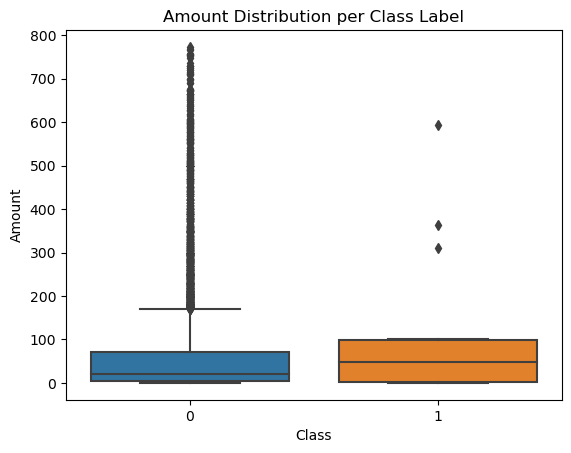

In [16]:
sns.boxplot(x='Class', y='Amount', data=df_clean)
plt.title("Amount Distribution per Class Label")
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


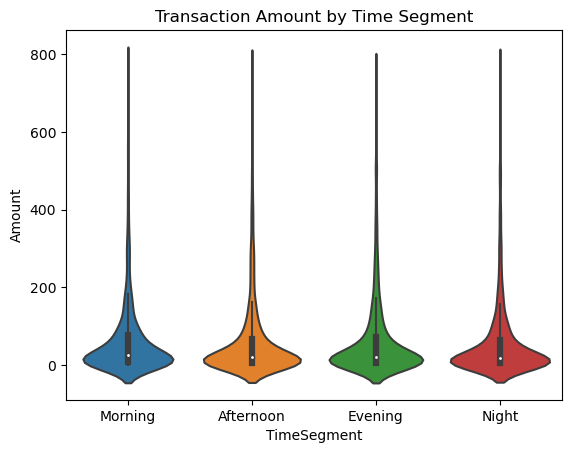

In [17]:
sns.violinplot(x='TimeSegment', y='Amount', data=df_clean)
plt.title("Transaction Amount by Time Segment")
plt.show()


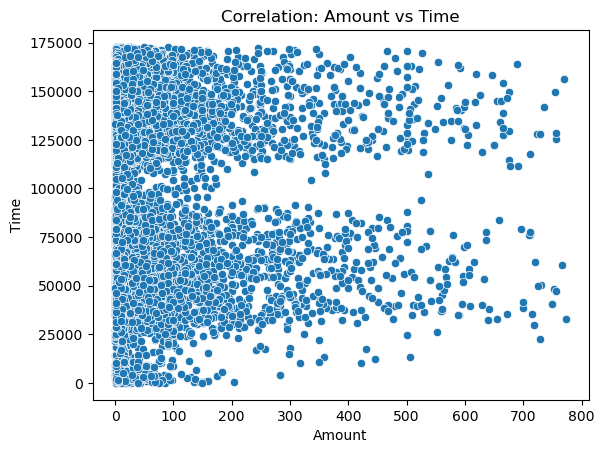

In [18]:
sns.scatterplot(x='Amount', y='Time', data=df_clean)
plt.title("Correlation: Amount vs Time")
plt.show()